In [1]:
from solver import Solver
from model import Net
from dataset import RotationDataset
from torch.utils.data import DataLoader
import torch
import numpy as np
from coordinate_transformation import euclidean_to_spherical, spherical_to_euclidean
import math
import time
import lossfn
from experiment import run_experiment, run_experiment_variable_loss, run_experiment_augmented_lagrangian, run_experiment_augmented_lagrangian_auto
import matplotlib.pyplot as plt

In [2]:
SEED_TEST = 0

In [3]:
def plot_train_loss(dim, paths, logscale=True, labels=[], includeTest=False, onlyTest=False):
    plt.figure(figsize=(13,7))
    if len(labels) == 0:
        labels = [''] * len(paths)
    for path, label in zip(paths, labels):
        # Plot train loss
        model = Net(dim, n_hidden_layers=max(1, int(math.log(dim, 2))))
        solver = Solver(model)
        solver.load_checkpoint(path)
        # if "gradient_norm" in 
        # plt.plot(solver.hist["iterations"], solver.hist["gradient_norm"], label='grad_'+label)
        if not onlyTest:
            for key in solver.hist["individual_train_losses"]:
                plt.plot(solver.hist["iterations"], solver.hist["individual_train_losses"][key], label=str(key)+'_'+str(label))
        if includeTest:
            plt.plot(solver.hist["iterations"], solver.hist["test_loss"], label='test_'+str(label))
    plt.legend()
    if logscale:
        plt.yscale('log')
    plt.ylabel("train loss")
    plt.xlabel("iteration")
    plt.show()

In [4]:
start_time = time.time()
train_seed = 1683
n_train = 17
dim = 2
loss_fn = [{'loss_fn': lossfn.get_mse_loss(), 'weight': 1, 'label': 'mse'}]
lin_constraints = [{'fn': lossfn.det_linear, 'label': 'det'}]
run_experiment_augmented_lagrangian_auto(dim, n_train, train_seed, loss_fn, lin_constraints,
                                             'tmp3/', iterations=50)
print("Time = {}".format(time.time() - start_time))

TypeError: run_experiment_augmented_lagrangian_auto() missing 4 required positional arguments: 'constraint_sq_weight_multiplier', 'eps_gam_decay_rate', 'grad_threshold', and 'checkpoint_dir'

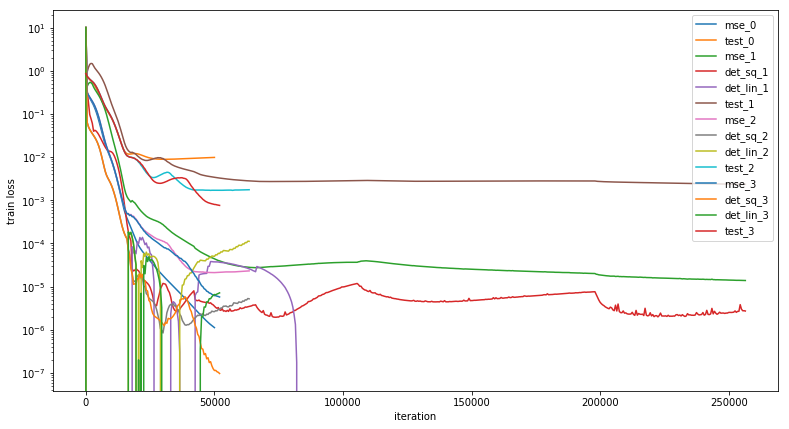

In [5]:
path0 = 'tmp_orig/final.pkl'
path1 = 'tmp/best.pkl'
path2 = 'tmp2/final.pkl'
path3 = 'tmp3/final.pkl'
paths = [path0, path1, path2, path3]
labels = list(range(len(paths)))
plot_train_loss(dim, paths, labels=labels, includeTest=True)

In [4]:
dim = 2
n_train = 17
train_seed = 1683
loss_fn = [{'loss_fn': lossfn.get_mse_loss(), 'weight': 1, 'label': 'mse'},
          {'loss_fn': lossfn.get_det_loss(), 'weight': 10, 'label': 'norm'},]
run_experiment(dim, n_train, train_seed, loss_fn, 0, 'tmp/', iterations=50000, lr=5e-5, n_test=4096)


Model save: tmp_norm_10/best.pkl
Epoch 0	Iteration 0
Train score = 10.0	Test score = 0.8637702465057373
Epoch 200	Iteration 200
Train score = 2.303720235824585	Test score = 1.2093168497085571
Epoch 400	Iteration 400
Train score = 1.2970410585403442	Test score = 1.554345965385437
Epoch 600	Iteration 600
Train score = 1.124717354774475	Test score = 1.7295341491699219
Epoch 800	Iteration 800
Train score = 1.081507921218872	Test score = 1.7900301218032837
Epoch 1000	Iteration 1000
Train score = 1.0577062368392944	Test score = 1.8093559741973877
Epoch 1200	Iteration 1200
Train score = 1.0408416986465454	Test score = 1.8161574602127075
Epoch 1400	Iteration 1400
Train score = 1.0268882513046265	Test score = 1.8173331022262573
Epoch 1600	Iteration 1600
Train score = 1.013571858406067	Test score = 1.8148399591445923
Epoch 1800	Iteration 1800
Train score = 0.9995802640914917	Test score = 1.8097225427627563
Epoch 2000	Iteration 2000
Train score = 0.984148383140564	Test score = 1.8026238679885864


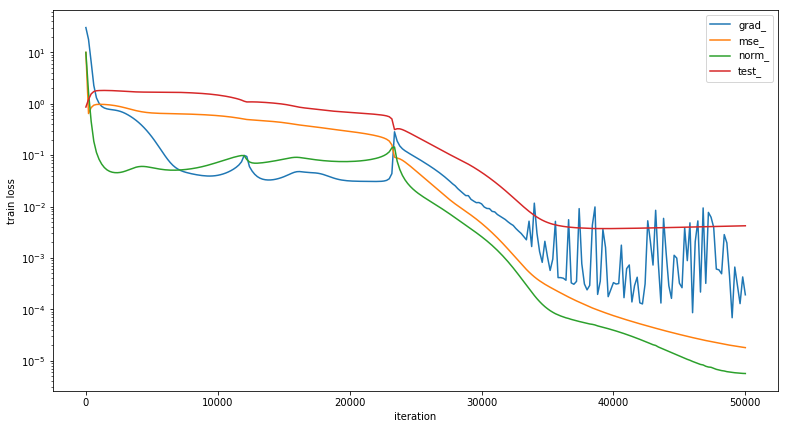

In [7]:
path0 = 'tmp_orig/final.pkl'
path1 = 'tmp_norm/final.pkl'
path2 = 'tmp_norm_10/final.pkl'
path3 = 'tmp_norm_5/final.pkl'
paths = [path2]
plot_train_loss(dim, paths, includeTest=True)

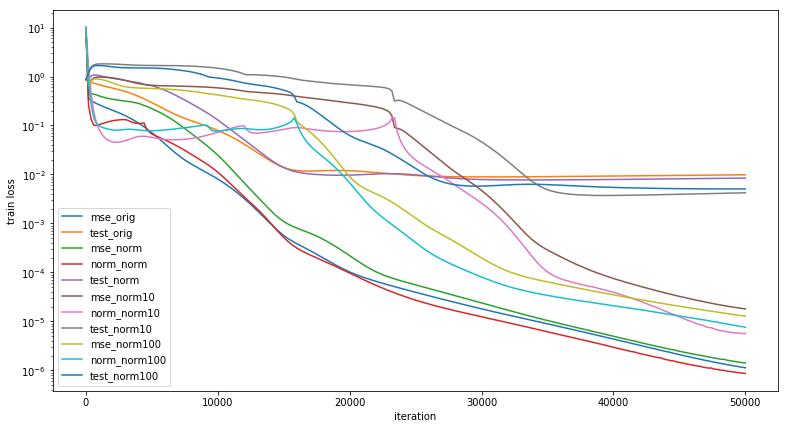

In [19]:
path0 = 'tmp_orig/final.pkl'
path1 = 'tmp_norm/final.pkl'
path2 = 'tmp_norm_10/final.pkl'
path3 = 'tmp_norm_5/final.pkl'
paths = [path0, path1, path2, path3]
plot_train_loss(dim, paths, labels=['orig', 'norm', 'norm10', 'norm100'], includeTest=True)

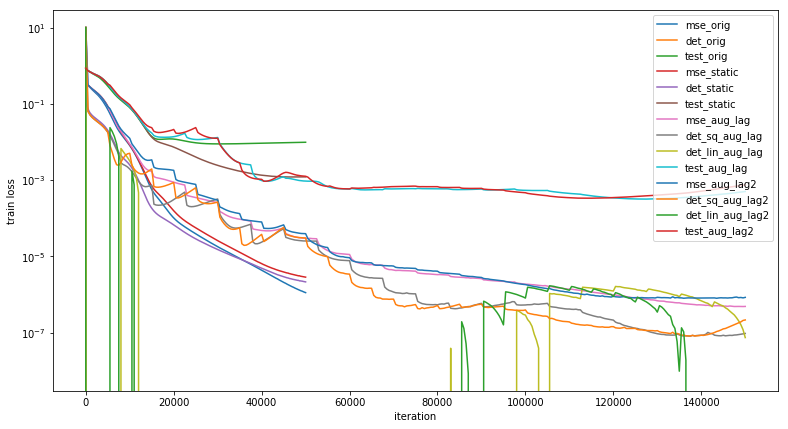

In [31]:
path0 = 'checkpoints/round2_detweight3/dim-{}_detweight-{}_ntrain-{}_seed-{}/final.pkl'.format(dim, 0, n_train, train_seed)
path1 = 'checkpoints/round2_detweight3/dim-{}_detweight-{}_ntrain-{}_seed-{}/final.pkl'.format(dim, 0.1, n_train, train_seed)
path2 = 'tmp2/final.pkl'
path3 = 'tmp3/final.pkl'
plot_train_loss(dim, [path0, path1, path2, path3], logscale=True, labels=["orig", "static", "aug_lag", "aug_lag2"], includeTest=True)

In [32]:
import os
os.system('say "your program has finished"')

0

In [6]:
dim = 2
n_train = 18
config = {'weights': [1e-2] * 30, 'iterations': [5000] * 30}
loss_fn = [{'loss_fn': lossfn.get_mse_loss(), 'weight': 1, 'label': 'mse'}]
lin_constraints = [{'fn': lossfn.det_linear, 'label': 'det'}]
checkpoint_dir = 'tmpx/'
run_experiment_augmented_lagrangian(dim, n_train, train_seed, loss_fn, lin_constraints, config['weights'],
                                        checkpoint_dir, iterations=config['iterations'])

1.5114670960264784
Model save: tmpx/best.pkl
Epoch 0	Iteration 0
Train score = 10.0	Test score = 0.8619831800460815
0.43960349372071283
Model save: tmpx/best.pkl
Epoch 500	Iteration 500
Train score = 0.3902779221534729	Test score = 0.7216002941131592
0.23159376603128626
Model save: tmpx/best.pkl
Epoch 1000	Iteration 1000
Train score = 0.33993762731552124	Test score = 0.654165506362915
0.15143716289378592
Model save: tmpx/best.pkl
Epoch 1500	Iteration 1500
Train score = 0.30480241775512695	Test score = 0.6017175316810608
0.1148065775904464
Model save: tmpx/best.pkl
Epoch 2000	Iteration 2000
Train score = 0.2756381630897522	Test score = 0.5639034509658813
0.10361591564527825
Model save: tmpx/best.pkl
Epoch 2500	Iteration 2500
Train score = 0.24790650606155396	Test score = 0.529347836971283
0.10154943313799583
Model save: tmpx/best.pkl
Epoch 3000	Iteration 3000
Train score = 0.2192784547805786	Test score = 0.4912661015987396
0.09979710421047931
Model save: tmpx/best.pkl
Epoch 3500	Iterati

In [33]:
start_time = time.time()
dim = 2
n_train = 18
train_seed = 1683
loss_fn = [{'loss_fn': lossfn.get_mse_loss(), 'weight': 1, 'label': 'mse'}]
lin_constraints = [{'fn': lossfn.det_linear, 'label': 'det'}]
checkpoint_dir = lambda config: 'tmp_aug/sqweight-{}_sqwmul-{}_eps-{}_gam-{}_decrate-{}_gradthresh-{}_it-{}/'.format(config['constraint_sq_weight'], config['constraint_sq_weight_multiplier'], config['eps'], config['gam'], config['eps_gam_decay_rate'], config['grad_threshold'], config['iterations'])

configs = [
    {'constraint_sq_weight': 0.001,
     'constraint_sq_weight_multiplier': 1.1,
     'eps': 1e-2,
     'gam': 0.1,
     'eps_gam_decay_rate': 0.9,
     'grad_threshold': 5e-3,
     'iterations': 50},
]
for config in configs:
    print("Start next config")
    run_experiment_augmented_lagrangian_auto(dim, n_train, train_seed, loss_fn, lin_constraints,
                                                 config['constraint_sq_weight'],
                                                 config['constraint_sq_weight_multiplier'],
                                                 config['eps'],
                                                 config['gam'],
                                                 config['eps_gam_decay_rate'],
                                                 config['grad_threshold'],
                                                 checkpoint_dir(config),
                                                 iterations=config['iterations'])
print("Time = {}".format(time.time() - start_time))

Start next config
Start iteration 0, after 0 iterations, sqweight=0.001
Test loss 0.8620012402534485
Gradient norm       1.2937374811528335
grad_norm_threshold 0.005
Test loss 0.7395685911178589
Gradient norm       0.3655218309044227
grad_norm_threshold 0.005
Test loss 0.6794953942298889
Gradient norm       0.18259174251779564
grad_norm_threshold 0.005
Test loss 0.622708797454834
Gradient norm       0.12476809181962467
grad_norm_threshold 0.005
Test loss 0.5764774680137634
Gradient norm       0.10111255449649542
grad_norm_threshold 0.005
Test loss 0.5335127115249634
Gradient norm       0.09410325344940186
grad_norm_threshold 0.005
Test loss 0.48925942182540894
Gradient norm       0.09142031041665936
grad_norm_threshold 0.005
Test loss 0.4434627294540405
Gradient norm       0.08783352781655315
grad_norm_threshold 0.005
Test loss 0.3975605070590973
Gradient norm       0.08237041884894405
grad_norm_threshold 0.005
Test loss 0.35299843549728394
Gradient norm       0.07509161811688522
grad_

checkpoints/round2_detweight3/dim-2_detweight-0.1_ntrain-18_seed-1683/final.pkl
checkpoints/round2_aug_lag_auto_det/dim-2_config-1_ntrain-18_seed-1683/final.pkl
tmp_aug/sqweight-0.1_sqwmul-1_eps-0_gam-0_decrate-0_gradthresh-0.001_it-50/final.pkl
tmp_aug/sqweight-0.01_sqwmul-1_eps-0_gam-0_decrate-0_gradthresh-0.001_it-50/final.pkl
tmp_aug/sqweight-0.0001_sqwmul-1.05_eps-0_gam-0_decrate-0_gradthresh-1_it-100/final.pkl
tmp_aug/sqweight-0.001_sqwmul-1.05_eps-0.001_gam-0.1_decrate-0.95_gradthresh-None_it-50/final.pkl
tmp_aug/sqweight-0.01_sqwmul-1.05_eps-0.001_gam-0.1_decrate-0.95_gradthresh-None_it-50/final.pkl
tmp_aug/sqweight-0.001_sqwmul-1.05_eps-0_gam-0_decrate-0_gradthresh-1_it-100/final.pkl
tmp_aug/sqweight-0.01_sqwmul-1.05_eps-0.001_gam-0.1_decrate-0.95_gradthresh-None_it-50/final.pkl


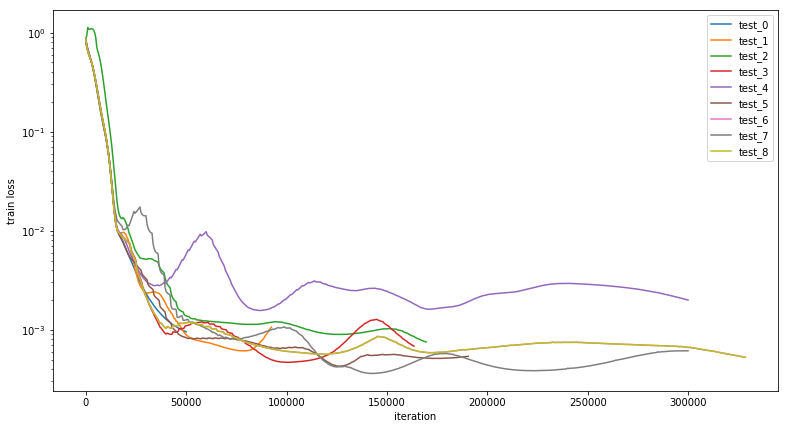

In [53]:
other_configs = [
    {'constraint_sq_weight': 0.01,
     'constraint_sq_weight_multiplier': 1,
     'eps': 1e-3,
     'gam': 0.1,
     'eps_gam_decay_rate': 0.95,
     'grad_threshold': None,
     'iterations': 50},
    {'constraint_sq_weight': 0.001,
     'constraint_sq_weight_multiplier': 1.1,
     'eps': 1e-3,
     'gam': 0.1,
     'eps_gam_decay_rate': 0.95,
     'grad_threshold': 1e-3,
     'iterations': 50},
    {'constraint_sq_weight': 0.001,
     'constraint_sq_weight_multiplier': 1.1,
     'eps': 1e-2,
     'gam': 0.1,
     'eps_gam_decay_rate': 0.9,
     'grad_threshold': 5e-3,
     'iterations': 50},
    {'constraint_sq_weight': 0.1,
     'constraint_sq_weight_multiplier': 1.1,
     'eps': 1e-3,
     'gam': 0.1,
     'eps_gam_decay_rate': 0.95,
     'grad_threshold': None,
     'iterations': 50},

]
other_paths = ['checkpoints/round2_detweight3/dim-{}_detweight-{}_ntrain-{}_seed-{}/final.pkl'.format(2, 0.1, n_train, train_seed),
               'checkpoints/round2_aug_lag_auto_det/dim-2_config-1_ntrain-18_seed-1683/final.pkl',
               ]
import os
paths = other_paths + []
for config in [] + third_configs:
    if os.path.exists(checkpoint_dir(config)+'final.pkl'):
        paths.append(checkpoint_dir(config)+'final.pkl')
    else:
        paths.append(checkpoint_dir(config)+'best.pkl')
labels = list(range(len(paths)))
for p in paths:
    print(p)
plot_train_loss(dim, paths, logscale=True, labels=labels, includeTest=True, onlyTest=True)


In [52]:
third_configs = [
    {'constraint_sq_weight': 0.1,
     'constraint_sq_weight_multiplier': 1,
     'eps': 0,
     'gam': 0,
     'eps_gam_decay_rate': 0,
     'grad_threshold': 1e-3,
     'iterations': 50},
    {'constraint_sq_weight': 0.01,
     'constraint_sq_weight_multiplier': 1,
     'eps': 0,
     'gam': 0,
     'eps_gam_decay_rate': 0,
     'grad_threshold': 1e-3,
     'iterations': 50},
    {'constraint_sq_weight': 0.0001,
     'constraint_sq_weight_multiplier': 1.05,
     'eps': 0,
     'gam': 0,
     'eps_gam_decay_rate': 0,
     'grad_threshold': 1,
     'iterations': 100},
    {'constraint_sq_weight': 0.001,
     'constraint_sq_weight_multiplier': 1.05,
     'eps': 1e-3,
     'gam': 0.1,
     'eps_gam_decay_rate': 0.95,
     'grad_threshold': None,
     'iterations': 50},
    {'constraint_sq_weight': 0.01,
     'constraint_sq_weight_multiplier': 1.05,
     'eps': 1e-3,
     'gam': 0.1,
     'eps_gam_decay_rate': 0.95,
     'grad_threshold': None,
     'iterations': 50},
    {'constraint_sq_weight': 0.001,
     'constraint_sq_weight_multiplier': 1.05,
     'eps': 0,
     'gam': 0,
     'eps_gam_decay_rate': 0,
     'grad_threshold': 1,
     'iterations': 100},
    {'constraint_sq_weight': 0.01,
     'constraint_sq_weight_multiplier': 1.05,
     'eps': 1e-3,
     'gam': 0.1,
     'eps_gam_decay_rate': 0.95,
     'grad_threshold': None,
     'iterations': 50},
    {'constraint_sq_weight': 0.1,
     'constraint_sq_weight_multiplier': 1.05,
     'eps': 1e-3,
     'gam': 0.1,
     'eps_gam_decay_rate': 0.95,
     'grad_threshold': None,
     'iterations': 50},
    {'constraint_sq_weight': 0.001,
     'constraint_sq_weight_multiplier': 1.1,
     'eps': 1e-3,
     'gam': 0.1,
     'eps_gam_decay_rate': 0.95,
     'grad_threshold': None,
     'iterations': 50},
    {'constraint_sq_weight': 0.01,
     'constraint_sq_weight_multiplier': 1.1,
     'eps': 1e-3,
     'gam': 0.1,
     'eps_gam_decay_rate': 0.95,
     'grad_threshold': None,
     'iterations': 50},
]


In [4]:
"""
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.graph_objs as go
import plotly
plotly.tools.set_credentials_file(username='KoBstrtr', api_key='weMO837juuptFvlGjnXg')
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
p1 = []
p2 = []
p3 = []
for a_, b, c in get_test_loader(3, 1024):
    for a in a_:
        p1.append(a[0].item())
        p2.append(a[1].item())
        p3.append(a[2].item())
ax.scatter(p1, p2, p3, s=0.1)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

x2, y2, z2 = p1, p2, p3
trace2 = go.Scatter3d(
    x=x2,
    y=y2,
    z=z2,
    mode='markers',
    marker=dict(
        color='rgb(127, 127, 127)',
        size=1,
        symbol='circle',
        line=dict(
            color='rgb(204, 204, 204)',
            width=1
        ),
        opacity=0.9
    )
)
data = [trace2]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='simple-3d-scatter')"""
_ = 1